In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns

In [2]:
df = pd.read_csv('/content/housing.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.shape

(20640, 9)

In [8]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [40]:
X = df.iloc[ : , [1,2]].values
X

array([[41.        ,  6.98412698],
       [21.        ,  6.23813708],
       [52.        ,  8.28813559],
       ...,
       [17.        ,  5.20554273],
       [18.        ,  5.32951289],
       [16.        ,  5.25471698]])

In [41]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1,min_samples=3,metric='euclidean')

In [42]:
model = db.fit_predict(X)

In [43]:
model

array([0, 1, 2, ..., 1, 1, 1])

In [44]:
labels = db.labels_
labels

array([0, 1, 2, ..., 1, 1, 1])

In [45]:
n = len(set(labels)) - (1 if -1 in labels else 0)
n

22

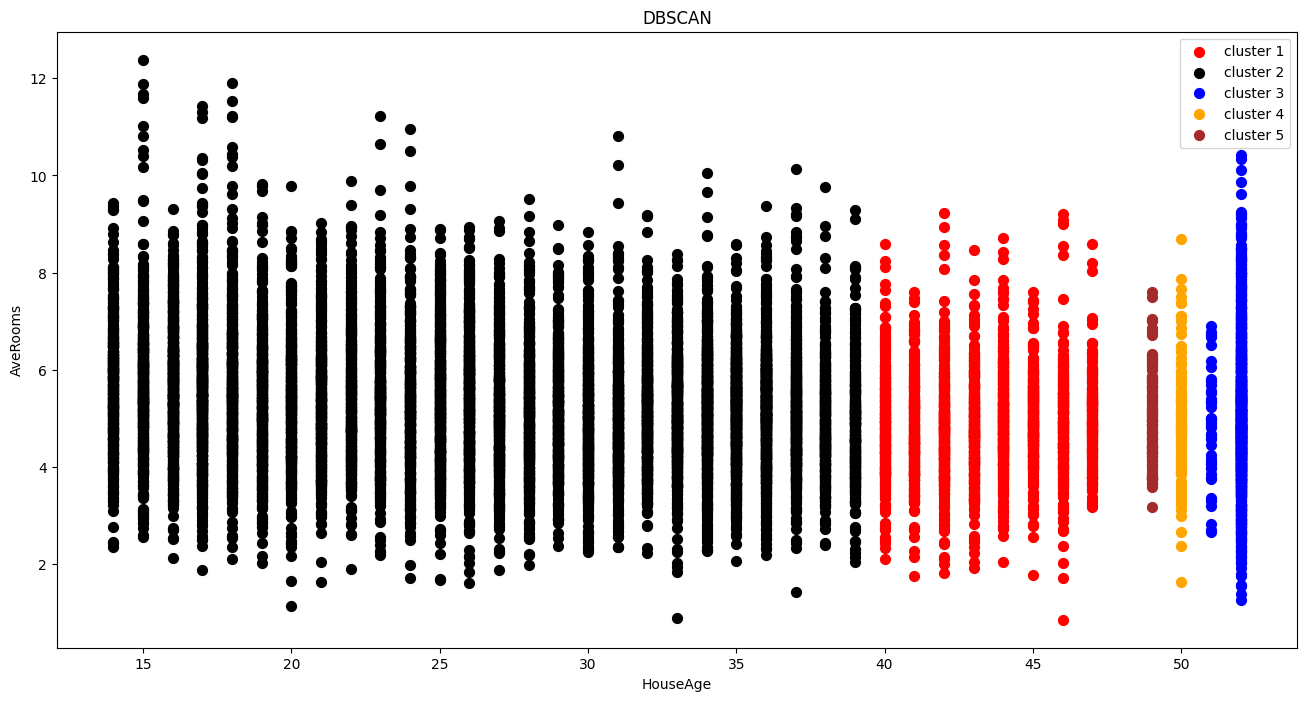

In [47]:
plt.figure(figsize =(16,8))
plt.scatter(X[labels== 0,0],X[labels == 0,1],color='red',label = 'cluster 1',s=50)
plt.scatter(X[labels== 1,0],X[labels == 1,1],color='black',label = 'cluster 2',s=50)
plt.scatter(X[labels== 2,0],X[labels == 2,1],color='blue',label = 'cluster 3',s=50)
plt.scatter(X[labels== 3,0],X[labels == 3,1],color='orange',label = 'cluster 4',s=50)
plt.scatter(X[labels== 4,0],X[labels == 4,1],color='brown',label = 'cluster 5',s=50)
plt.title('DBSCAN')
plt.xlabel('HouseAge')
plt.ylabel('AveRooms')
plt.legend()
plt.grid(False)
plt.show()